In [650]:
import pickle
import treeUtil
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
from textblob import Word
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from readability import Readability
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import string
import tensorflow as tf
import keras
from keras.models import load_model
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.backend import clear_session
from keras.layers import BatchNormalization

In [651]:
[lib, con, neutral] = pickle.load(open('ibcData.pkl', 'rb'))

Extracting the leaf nodes

In [652]:
# leaf = lib[0].get_leaves()
# print(len(leaf))
# leaf[3].print_leaf()

# how to access sentence text

In [653]:
# print ('Liberal examples (out of ', len(lib), ' sentences): ')
# for tree in lib[0:5]:
#     print (tree.get_words())

In [654]:
# print ('\nConservative examples (out of ', len(con), ' sentences): ')
# for tree in con[0:5]:
#     print (tree.get_words())

In [655]:
# print ('\nNeutral examples (out of ', len(neutral), ' sentences): ')
# for tree in neutral[0:5]:
#     print (tree.get_words())

In [656]:
def listFromTree(tree):
    lst = []
    i = 0
    for ex_tree in tree:
        lst.append(ex_tree.get_words())
#         i += 1
#         if i == 600:
#             break
#        for node in ex_tree:

#         # remember, only certain nodes have labels (see paper for details)
#         if hasattr(node, 'label'):
#             if node.label == "Liberal":
#                 liberal.append(node.get_words())
#             elif node.label == "Neutral":
#                 neutral.append(node.get_words())
#             elif node.label == "Conservative":
#                 conserv.append(node.get_words())
#                 (node.label, ': ', node.get_words())
#     #             print (type(node.get_words()))
    return lst
        

In [657]:
def listsFromTrees(treelib, treeneu, treecon):
    lstLib = []
    lstNeu = []
    lstCon = []
    wordLen = 6
    for ex_tree in treelib:
        #lst.append(ex_tree.get_words())
        for node in ex_tree:
        # remember, only certain nodes have labels (see paper for details)
            if hasattr(node, 'label') and len(node.get_words().split()) > wordLen:
                if node.label == "Liberal":
                    lstLib.append(node.get_words())
                elif node.label == "Neutral":
                    lstNeu.append(node.get_words())
                elif node.label == "Conservative":
                    lstCon.append(node.get_words())

    for ex_tree in treeneu:
        #lst.append(ex_tree.get_words())
        for node in ex_tree:
        # remember, only certain nodes have labels (see paper for details)
            if hasattr(node, 'label') and len(node.get_words().split()) > wordLen:
                if node.label == "Liberal":
                    lstLib.append(node.get_words())
                elif node.label == "Neutral":
                    lstNeu.append(node.get_words())
                elif node.label == "Conservative":
                    lstCon.append(node.get_words())
                
    for ex_tree in treecon:
        #lst.append(ex_tree.get_words())
        for node in ex_tree:
        # remember, only certain nodes have labels (see paper for details)
            if hasattr(node, 'label') and len(node.get_words().split()) > wordLen:
                if node.label == "Liberal":
                    lstLib.append(node.get_words())
                elif node.label == "Neutral":
                    lstNeu.append(node.get_words())
                elif node.label == "Conservative":
                    lstCon.append(node.get_words())
    return lstLib, lstNeu, lstCon

In [658]:
# how to access phrase labels for a particular tree
#ex_tree = lib[1]

liberal = []
neut = []
conserv = []

#Only sentences
liberal = listFromTree(lib)
neut = listFromTree(neutral)
conserv = listFromTree(con)

#Sentences and phrases
#liberal, neut, conserv = listsFromTrees(lib, neutral, con)

print (len(liberal))
print (len(neut))
print (len(conserv))




2025
600
1701


In [659]:
def cleanList(dataList):
    newList = []
    #lowercase
    newList = [x.lower() for x in dataList]
    #removes punctuations
    newList = [s.translate(str.maketrans('', '', string.punctuation)) for s in  newList]
    #removes stop words
    stop = stopwords.words('english')
    for i in range(0, len(newList)):
        newList[i] = " ".join(x for x in newList[i].split() if x not in stop)
    return newList

In [660]:
liberal = cleanList(liberal)
neut = cleanList(neut)
conserv = cleanList(conserv)
print (len(liberal))
print (len(neut))
print (len(conserv))

2025
600
1701


In [661]:
l = pd.DataFrame({"liberal":liberal})
n = pd.DataFrame({"neutral":neut})
c = pd.DataFrame({"conservative":conserv})

In [662]:
data = pd.concat([l,n,c], axis=1)
data['liberal'] = data['liberal'].fillna('')
data['neutral'] = data['neutral'].fillna('')
data['conservative'] = data['conservative'].fillna('')

In [663]:
def topTen(dataFr, index):
    frequency = pd.Series(' '.join(dataFr[index]).split()).value_counts()[:10]
    frequency = list(frequency.index)
    return dataFr[index].apply(lambda x: " ".join(x for x in x.split() if x not in frequency))

In [664]:
def bottomTen(dataFr, index):
    frequency = pd.Series(' '.join(dataFr[index]).split()).value_counts()[-10:]
    frequency = list(frequency.index)
    return dataFr[index].apply(lambda x: " ".join(x for x in x.split() if x not in frequency))

In [665]:
#Removes top 10 words
data['neutral'] = topTen(data, "neutral")
data['liberal'] = topTen(data, "liberal")
data['conservative'] = topTen(data, "conservative")

In [666]:
#Removes top 10 rare words
data['neutral'] = bottomTen(data, "neutral")
data['liberal'] = bottomTen(data, "liberal")
data['conservative'] = bottomTen(data, "conservative")

In [667]:
def lemmat(dataFr, index):
    newData =dataFr
    for i in range(0, len(dataFr[index])):
        newData[index][i] = " ".join([Word(word).lemmatize() for word in dataFr[index][i].split()])
    return newData[index]

In [668]:
#Lemmatization
data['neutral'] = lemmat(data, "neutral")
data['liberal'] = lemmat(data, "liberal")
data['conservative'] = lemmat(data, "conservative")


In [674]:
#for col in data.columns:
all_text = " ".join(x for col in data.columns for x in data[col])
words = all_text.split()
len(words)

88949

In [675]:
from collections import Counter
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}



In [704]:
l_Train = data['liberal'].tolist()[0:int(len(liberal)*.8)]
l_Valid = data['liberal'].tolist()[int(len(liberal)*.8):int(len(liberal)*.9)]
l_Test = data['liberal'].tolist()[int(len(liberal)*.9):]

n_Train = data['neutral'].tolist()[0:int(len(neut)*.8)]
n_Valid = data['neutral'].tolist()[int(len(neut)*.8):int(len(neut)*.9)]
n_Test = data['neutral'].tolist()[int(len(neut)*.9):len(neut)]

c_Train = data['conservative'].tolist()[0:int(len(conserv)*.8)]
c_Valid = data['conservative'].tolist()[int(len(conserv)*.8):int(len(conserv)*.9)]
c_Test = data['conservative'].tolist()[int(len(conserv)*.9):len(conserv)]




In [559]:
y = [1] * 600 + [0] * 600 + [-1] * 600

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [562]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data['liberal'].tolist() + data['neutral'].tolist() + data['conservative'].tolist(), y, test_size=0.1, random_state=1)

xtrain, xvalid, ytrain, yvalid = train_test_split(xtrain, ytrain, test_size=len(xtest)/len(xtrain), random_state=1)


In [678]:
polit_ints_train = []
polit_ints_valid = []
polit_ints_test = []

for col in t_data.columns:
    for each in t_data[col]:
        if each != "":
            polit_ints_train.append([vocab_to_int[word] for word in each.split()])
            

for col in v_data.columns:
    for each in v_data[col]:
        if each != "":
            polit_ints_valid.append([vocab_to_int[word] for word in each.split()])

for col in test_data.columns:
    for each in test_data[col]:
        if each != "":
            polit_ints_test.append([vocab_to_int[word] for word in each.split()])

KeyError: 'exaction'

In [ ]:
# Version 2

polit_ints_train = []
polit_ints_valid = []
polit_ints_test = []


for each in xtrain:
    if each != "":
        polit_ints_train.append([vocab_to_int[word] for word in each.split()])
            

for each in xvalid:
    if each != "":
        polit_ints_valid.append([vocab_to_int[word] for word in each.split()])


for each in xtest:
    if each != "":
        polit_ints_test.append([vocab_to_int[word] for word in each.split()])

In [679]:
lt1 = pd.DataFrame({"liberal":l_Train})
nt1 = pd.DataFrame({"neutral":n_Train})
ct1 = pd.DataFrame({"conservative": c_Train})

t_data = pd.concat([lt1,nt1,ct1], axis=1)
t_data['liberal'] = t_data['liberal'].fillna('')
t_data['neutral'] = t_data['neutral'].fillna('')
t_data['conservative'] = t_data['conservative'].fillna('')

lt2 = pd.DataFrame({"liberal":l_Valid})
nt2 = pd.DataFrame({"neutral":n_Valid})
ct2 = pd.DataFrame({"conservative": c_Valid})

v_data = pd.concat([lt2,nt2,ct2], axis=1)
v_data['liberal'] = v_data['liberal'].fillna('')
v_data['neutral'] = v_data['neutral'].fillna('')
v_data['conservative'] = v_data['conservative'].fillna('')

lt3 = pd.DataFrame({"liberal":l_Test})
nt3 = pd.DataFrame({"neutral":n_Test})
ct3 = pd.DataFrame({"conservative": c_Test})

test_data = pd.concat([lt3,nt3,ct3], axis=1)
test_data['liberal'] = test_data['liberal'].fillna('')
test_data['neutral'] = test_data['neutral'].fillna('')
test_data['conservative'] = test_data['conservative'].fillna('')




In [680]:
len(lt1) + len(nt1) + len(ct1)

3460

In [681]:
polit_ints_train = []
polit_ints_valid = []
polit_ints_test = []

for col in t_data.columns:
    for each in t_data[col]:
        if each != "":
            polit_ints_train.append([vocab_to_int[word] for word in each.split()])
            

for col in v_data.columns:
    for each in v_data[col]:
        if each != "":
            polit_ints_valid.append([vocab_to_int[word] for word in each.split()])

for col in test_data.columns:
    for each in test_data[col]:
        if each != "":
            polit_ints_test.append([vocab_to_int[word] for word in each.split()])


In [707]:
# Version 1
ytrain = []
yvalid = []
ytest = []

# x_train = x_train + [x for x in data["liberal"]] 
# x_train = x_train + [x for x in data["neutral"][0:600]]
# x_train = x_train + [x for x in data["conservative"][0:1701]]

ytrain = ytrain + ([1] * len(lt1))
ytrain = ytrain + ([0] * len(nt1))
ytrain = ytrain + ([-1] * len(ct1))

yvalid = yvalid + ([1] * len(lt2))
yvalid = yvalid + ([0] * len(nt2))
yvalid = yvalid + ([-1] * len(ct2))

ytest = ytest + ([1] * len(lt3))
ytest = ytest + ([0] * len(nt3))
ytest = ytest + ([-1] * len(ct3))




In [706]:
len(y_test)

434

In [683]:
# Version 2
y_train = []
y_valid = []
y_test = []

# x_train = x_train + [x for x in data["liberal"]] 
# x_train = x_train + [x for x in data["neutral"][0:600]]
# x_train = x_train + [x for x in data["conservative"][0:1701]]

y_train = y_train + ([1] * len(lt1))
y_train = y_train + ([0] * len(nt1))
y_train = y_train + ([-1] * len(ct1))

y_valid = y_valid + ([1] * len(lt2))
y_valid = y_valid + ([0] * len(nt2))
y_valid = y_valid + ([-1] * len(ct2))

y_test = y_test + ([1] * len(lt3))
y_test = y_test + ([0] * len(nt3))
y_test = y_test + ([-1] * len(ct3))



In [708]:
labels_train = np.array(ytrain)
labels_valid = np.array(yvalid)
labels_test = np.array(ytest)

In [699]:
len(labels_train)

1440

In [686]:
from collections import Counter
polit_lens = Counter([len(x) for x in polit_ints_valid])
print("Zero-length sentences: {}".format(polit_lens[0]))
print("Maximum sentence length: {}".format(max(polit_lens)))

Zero-length sentences: 0
Maximum sentence length: 39


In [700]:
seq_len = 50
xtrain = np.zeros((len(polit_ints_train), seq_len), dtype=int)
# print(features[:10,:100])
for i, row in enumerate(polit_ints_train):
    xtrain[i, -len(row):] = np.array(row)[:seq_len]


xvalid = np.zeros((len(polit_ints_valid), seq_len), dtype=int)
# print(features[:10,:100])
for i, row in enumerate(polit_ints_valid):
    xvalid[i, -len(row):] = np.array(row)[:seq_len]



xtest = np.zeros((len(polit_ints_test), seq_len), dtype=int)
# print(features[:10,:100])
for i, row in enumerate(polit_ints_test):
    xtest[i, -len(row):] = np.array(row)[:seq_len]



In [569]:
seq_len = 50
features = np.zeros((len(polit_ints), seq_len), dtype=int)
# print(features[:10,:100])
for i, row in enumerate(polit_ints):
    features[i, -len(row):] = np.array(row)[:seq_len]
features[:10,:100]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0, 1389,  438,   20,  581,  377,  137,   54, 3291,   43,  539,
         110, 7113, 1039,  300, 1143,  196],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0, 3292,  802,  144, 5014,
        2801, 1288, 1040,  413, 2163, 5015,  841,  131, 1390,  100,  248,
         157, 1289, 3913, 1290, 3293,  561],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  582, 5016,  329,  193,  104,  193,  145,
        3914,   20, 71

In [81]:
print(len(features_test))
print(len(labels))
print(type(features_test))
print(features_test[41])
print(len(features_test[41]))
print(polit_ints_test[41])
print(len(polit_ints_test[41]))
print()
for item in features_test: 
    if item[49] == 0:
        print( item)


434
3460
<class 'numpy.ndarray'>
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0    29  3991  2362  9999  3177   942
   362    40 10000     8 10001   176   311   201  1618   282     3  3218
   567   359]
50
[29, 3991, 2362, 9999, 3177, 942, 362, 40, 10000, 8, 10001, 176, 311, 201, 1618, 282, 3, 3218, 567, 359]
20



In [28]:

features

array([[    0,     0,     0, ...,   300,  1142,   196],
       [    0,     0,     0, ...,  1290,  3292,   561],
       [    0,     0,     0, ...,   583,    73,    80],
       ...,
       [    0,     0,     0, ..., 14007,  2602,  2429],
       [    0,     0,     0, ...,   188,   259,  1883],
       [    0,     0,     0, ...,  2817,  7067,  1550]])

In [29]:
split_frac = 0.8


len_lib = len(liberal)
len_neu = len(neut)
len_con =  len(conserv)


split_index_lib = int(split_frac * len(liberal))
split_index_neu = int(len_lib + int(split_frac * len(neut)))
split_index_con =int(len_lib + len_neu + int(split_frac * len(conserv)))



split_frac = 0.5

size_lib = len_lib-split_index_lib
size_neu = len_lib+len_neu-split_index_neu
size_con = len(features)-split_index_con


split_index_lib = int(split_frac * size_lib)
split_index_neu = int(size_lib + int(split_frac * size_neu))
split_index_con = int(size_lib + size_neu + int(split_frac * size_con))

print(size_lib)
print(size_neu)
print(size_con)
print(len(features))
print()



print(split_index_lib)
print(split_index_neu)
print(split_index_con)

405
120
341
4326

202
465
695


In [30]:
len(conserv)

1701

In [31]:
split_frac = 0.8


len_lib = len(liberal)
len_neu = len(neut)
len_con =  len(conserv)


split_index_lib = int(split_frac * len(liberal))
split_index_neu = int(len_lib + int(split_frac * len(neut)))
split_index_con =int(len_lib + len_neu + int(split_frac * len(conserv)))


# 2025
# 600
# 1701

# 7809
# 8843
# 5969


train_x = np.array(features[:split_index_lib].tolist() + features[len_lib:split_index_neu].tolist() + features[len_lib+len_neu:split_index_con].tolist())
var_x = np.array(features[split_index_lib:len_lib].tolist() + features[split_index_neu:len_lib+len_neu].tolist() +   features[split_index_con:].tolist()) 
train_y = np.array(labels[:split_index_lib].tolist() + labels[len_lib:split_index_neu].tolist() + labels[len_lib+len_neu:split_index_con].tolist())
var_y = np.array(labels[split_index_lib:len_lib].tolist() + labels[split_index_neu:len_lib+len_neu].tolist() +   labels[split_index_con:].tolist()) 


split_frac = 0.5

size_lib = len_lib-split_index_lib
size_neu = len_lib+len_neu-split_index_neu
size_con = len(features)-split_index_con


split_index_lib = int(split_frac * size_lib)
split_index_neu = int(size_lib + int(split_frac * size_neu))
split_index_con = int(size_lib + size_neu + int(split_frac * size_con))


val_x, test_x = np.array(var_x[:split_index_lib+1].tolist() + var_x[size_lib:split_index_neu].tolist() + var_x[size_lib+size_neu:split_index_con].tolist()), np.array(var_x[split_index_lib+1:size_lib].tolist() + var_x[split_index_neu:size_lib+size_neu].tolist() + var_x[split_index_con:].tolist()) 
val_y, test_y = np.array(var_y[:split_index_lib+1].tolist() + var_y[size_lib:split_index_neu].tolist() + var_y[size_lib+size_neu:split_index_con].tolist()), np.array(var_y[split_index_lib+1:size_lib].tolist() + var_y[split_index_neu:size_lib+size_neu].tolist() + var_y[split_index_con:].tolist()) 

print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))
print("label set: \t\t{}".format(train_y.shape), 
      "\nValidation label set: \t{}".format(val_y.shape),
      "\nTest label set: \t\t{}".format(test_y.shape))

			Feature Shapes:
Train set: 		(3460, 50) 
Validation set: 	(433, 50) 
Test set: 		(433, 50)
label set: 		(3460,) 
Validation label set: 	(433,) 
Test label set: 		(433,)


In [32]:
np.expand_dims(train_x, 2).shape

(3460, 50, 1)

In [33]:
train_x.shape

(3460, 50)

In [34]:
len(features)

4326

In [35]:
lstm_size = 256
lstm_layers = 2
batch_size = 1000
learning_rate = 0.01

In [36]:
n_words = len(vocab_to_int) + 1 # Add 1 for 0 added to vocab
# Create the graph object
# tf.reset_default_graph()
# with tf.name_scope('inputs'):
#     inputs_ = tf.placeholder(tf.int32, [None, None], name="inputs")
#     labels_ = tf.placeholder(tf.int32, [None, None], name="labels")
#     keep_prob = tf.placeholder(tf.float32, name="keep_prob")

In [86]:
seed = np.random.seed(4)

In [98]:
xtrain[]


array([[    0,     0,     0, ...,   300,  1143,   196],
       [    0,     0,     0, ...,  1290,  3293,   561],
       [    0,     0,     0, ...,   583,    73,    80],
       ...,
       [    0,     0,     0, ...,    26,   388,  1759],
       [    0,     0,     0, ...,  1384,  2359, 13494],
       [    0,     0,     0, ...,   178,   223,   322]])

In [575]:
def build_model(*layers):
    model = Sequential()
    for layer in layers:
        model.add(layer)
    model.compile(loss='binary_crossentropy', optimizer='adam', 
                  metrics=['accuracy', 'binary_crossentropy'])
    return model

n_words = len(vocab_to_int) + 1 # Add 1 for 0 added to vocab
embedding_size=32
# model.add(Embedding(n_words, embedding_size, input_length=50))
# model.add(LSTM(100, input_shape=(50, 1)))

# model.add(Dense(32, activation='tanh'))
# model.add(Dense(3, activation='tanh'))
# model.add(Dense(1, activation='tanh'))
keras_models = {
#     'baseline_12_dropout': build_model(
#         Embedding(n_words, embedding_size, input_length=50),
#         LSTM(100, input_shape=(50, 1)),
#         Dense(12,  activation='relu', use_bias=True),
#         Dropout(rate=0.5),
#         Dense(1, activation='tanh')
#     ),
#     'baseline_50': build_model(
#         Embedding(n_words, embedding_size, input_length=50),
#         LSTM(100, input_shape=(50, 1)),
#         Dense(50, activation='relu', use_bias=True), 
#         Dense(1, activation='tanh')
#     ),
#     'baseline_100': build_model(
#         Embedding(n_words, embedding_size, input_length=50),
#         LSTM(100, input_shape=(50, 1)),
#         Dense(100, activation='relu', use_bias=True), 
#         Dense(1, activation='tanh')
#     ),
#     'baseline_norm_50': build_model(
#         Embedding(n_words, embedding_size, input_length=50),
#         LSTM(100, input_shape=(50, 1)),
#         BatchNormalization(),
#         Dense(50,  activation='relu', use_bias=True), 
#         Dense(1, activation='tanh')
#     ),
    'baseline_50_norm': build_model(
        Embedding(n_words, embedding_size, input_length=50),
        LSTM(100, input_shape=(50, 1)),
        Dense(50, activation='relu', use_bias=True), 
        BatchNormalization(),
        Dense(1, activation='tanh')
    )
#     'baseline_30_norm_12': build_model(
#         Embedding(n_words, embedding_size, input_length=50),
#         LSTM(100, input_shape=(50, 1)),
#         Dense(30, activation='relu', use_bias=True), 
#         BatchNormalization(),
#         Dense(12, activation='relu', use_bias=True), 
#         Dense(1, activation='tanh')
#     )
}



In [576]:
labels_train

array([1, 1, 1, ..., 0, 1, 1])

In [577]:
def train_model(model):
    return model.fit(xtrain, labels_train, validation_data=(xvalid, labels_valid), batch_size=64, epochs=75)
nn_raw_results = [(name, train_model(m)) for name, m in keras_models.items()]
nn_results = [(name, pd.DataFrame(hist.history)) for name, hist in nn_raw_results]

Train on 1440 samples, validate on 180 samples
Epoch 1/75
1440/1440 [==============================] - 3s 2ms/step - loss: -0.0391 - acc: 0.3403 - binary_crossentropy: -0.0391 - val_loss: 0.6744 - val_acc: 0.3444 - val_binary_crossentropy: 0.6744
Epoch 2/75
1440/1440 [==============================] - 2s 1ms/step - loss: -1.5440 - acc: 0.3951 - binary_crossentropy: -1.5440 - val_loss: 0.6846 - val_acc: 0.3056 - val_binary_crossentropy: 0.6846
Epoch 3/75
1440/1440 [==============================] - 2s 1ms/step - loss: -2.7745 - acc: 0.4972 - binary_crossentropy: -2.7745 - val_loss: -0.2174 - val_acc: 0.3111 - val_binary_crossentropy: -0.2174
Epoch 4/75
1440/1440 [==============================] - 2s 1ms/step - loss: -3.3113 - acc: 0.6139 - binary_crossentropy: -3.3113 - val_loss: 0.1810 - val_acc: 0.3056 - val_binary_crossentropy: 0.1810
Epoch 5/75
1440/1440 [==============================] - 2s 1ms/step - loss: -3.7041 - acc: 0.6424 - binary_crossentropy: -3.7041 - val_loss: -0.0449 - 

1440/1440 [==============================] - 2s 1ms/step - loss: -4.8875 - acc: 0.6403 - binary_crossentropy: -4.8875 - val_loss: -0.3733 - val_acc: 0.3667 - val_binary_crossentropy: -0.3733
Epoch 42/75
1440/1440 [==============================] - 2s 1ms/step - loss: -4.8900 - acc: 0.6417 - binary_crossentropy: -4.8900 - val_loss: -0.4690 - val_acc: 0.3833 - val_binary_crossentropy: -0.4690
Epoch 43/75
1440/1440 [==============================] - 2s 1ms/step - loss: -4.8904 - acc: 0.6417 - binary_crossentropy: -4.8904 - val_loss: -0.5226 - val_acc: 0.3944 - val_binary_crossentropy: -0.5226
Epoch 44/75
1440/1440 [==============================] - 2s 1ms/step - loss: -4.8905 - acc: 0.6417 - binary_crossentropy: -4.8905 - val_loss: -0.7246 - val_acc: 0.3833 - val_binary_crossentropy: -0.7246
Epoch 45/75
1440/1440 [==============================] - 2s 1ms/step - loss: -4.8908 - acc: 0.6438 - binary_crossentropy: -4.8908 - val_loss: -1.0085 - val_acc: 0.3778 - val_binary_crossentropy: -1.00

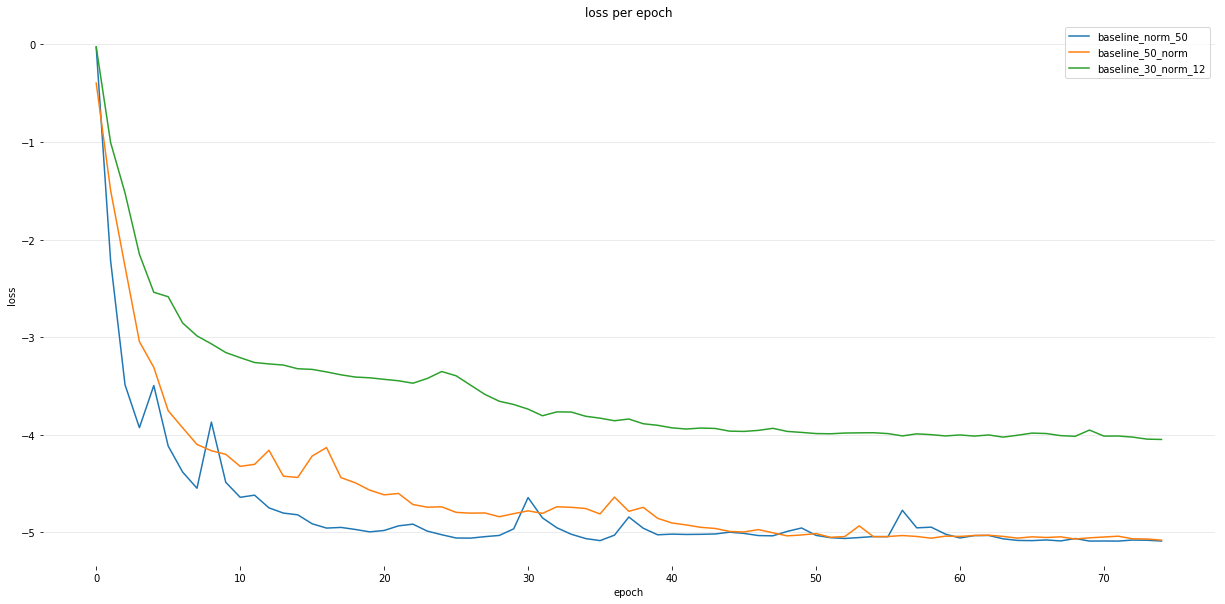

In [556]:
def plot_epochs(results, col, **kwargs):
    def plot_epoch_helper(hist_df, col, ax):
        ax.plot(hist_df[col], **kwargs)
        ax.set_title(col + ' per epoch')
        ax.set_ylabel(col)
        ax.set_xlabel('epoch')
        for sp in ax.spines:
            ax.spines[sp].set_visible(False)
        ax.yaxis.grid(True, alpha=0.3)
        ax.legend(labels=[n[0] for n in nn_results])
        
    fig, ax = plt.subplots(figsize=(21, 10))
    for name, hist in results:
        plot_epoch_helper(hist, col, ax)
plot_epochs(nn_results, 'loss')


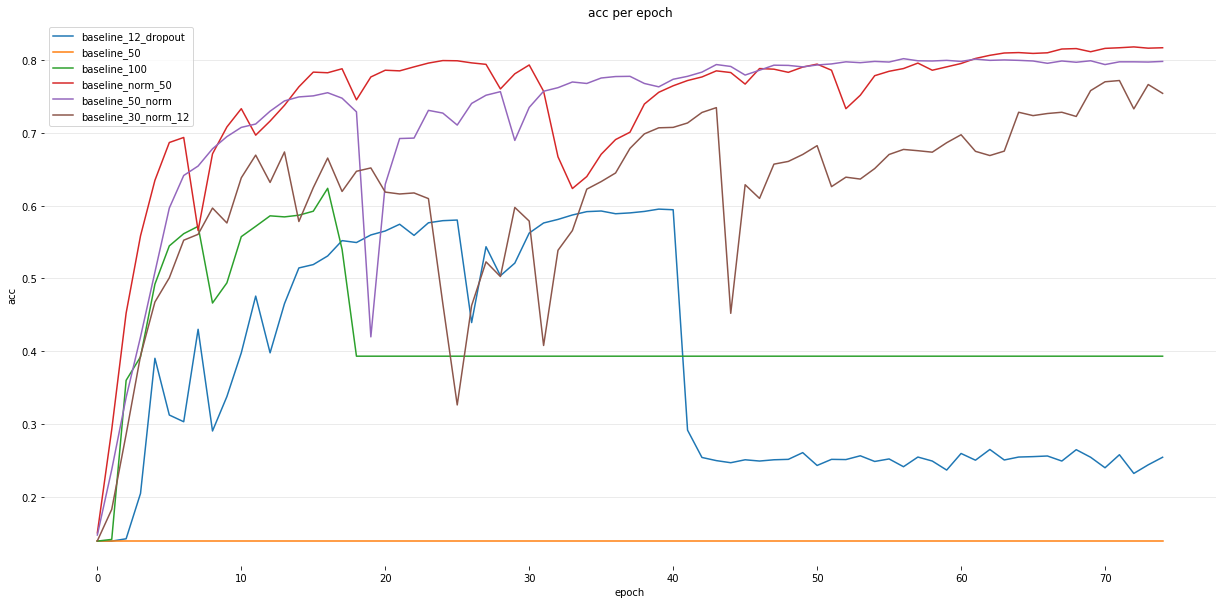

In [263]:
plot_epochs(nn_results, 'acc')


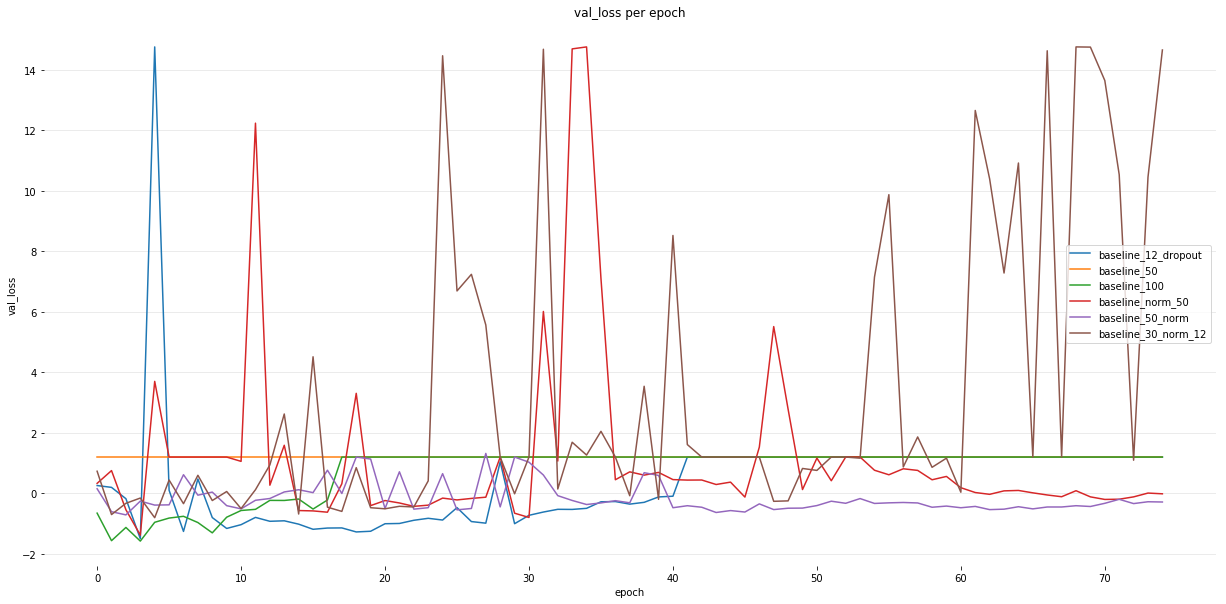

In [264]:
plot_epochs(nn_results, 'val_loss')


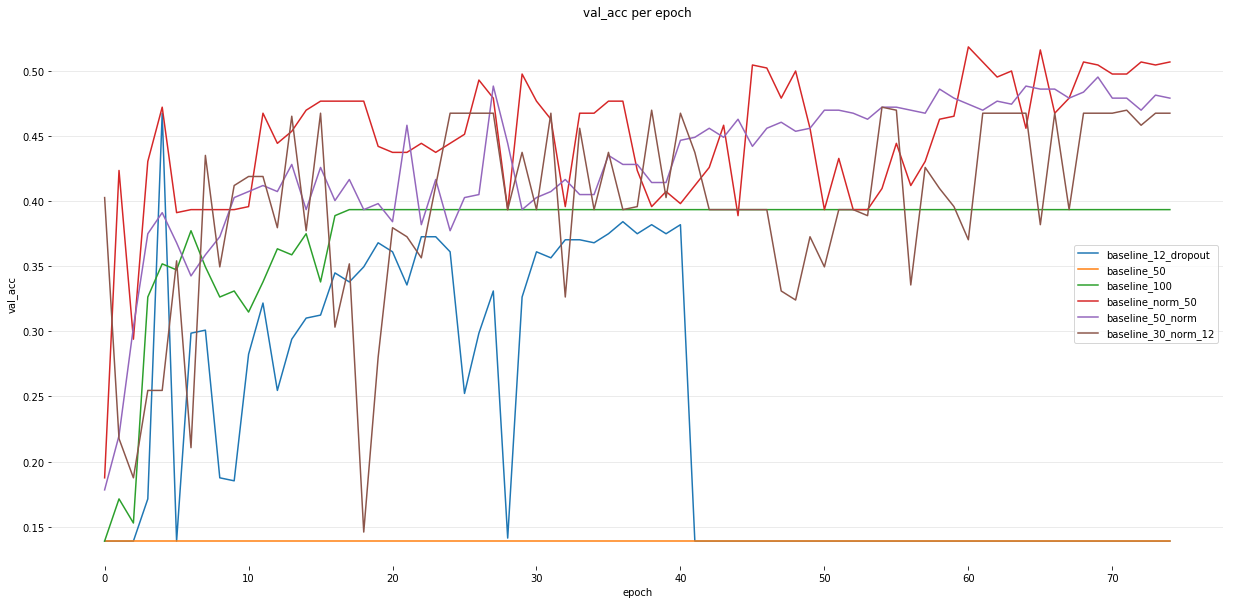

In [265]:
plot_epochs(nn_results, 'val_acc')

In [266]:
print(len(labels_test))
print(len(xtest))

434
434


In [578]:
for name, mod in keras_models.items():
    scores = mod.evaluate(xtest, labels_test, verbose=0)
    print('name: ', name, '\nTest accuracy:', scores[1], '\n')

name:  baseline_50_norm 
Test accuracy: 0.41111111177338494 



In [147]:
type(nn_results[0][1])

pandas.core.frame.DataFrame

In [38]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy', 'binary_crossentropy'])

In [39]:
model.fit(train_x, train_y, validation_data=(val_x, val_y), batch_size=32, epochs=1)

Instructions for updating:
Use tf.cast instead.
Train on 3460 samples, validate on 433 samples
Epoch 1/1
3460/3460 [==============================] - 8s 2ms/step - loss: 0.7329 - acc: 0.2214 - val_loss: 1.2284 - val_acc: 0.3926


In [40]:
scores = model.evaluate(test_x, test_y, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.394919168591224


In [509]:
type(model)

keras.engine.sequential.Sequential

In [587]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
clear_session()
embedding_size=32
model=Sequential()

# model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    
model.add(Embedding(n_words, embedding_size, input_length=50))
model.add(LSTM(100, input_shape=(50, 1)))
model.add(Dense(50, activation='relu', use_bias=True))
model.add(Dense(32, activation='relu', use_bias=True))
model.add(BatchNormalization())
model.add(Dense(12, activation='tanh', use_bias=True))
model.add(Dense(1, activation='tanh'))
    
# model.add(Embedding(n_words, embedding_size, input_length=50))
# model.add(LSTM(100, input_shape=(50, 1)))

# model.add(Dense(32, activation='tanh'))
# model.add(Dense(3, activation='tanh'))
# model.add(Dense(1, activation='tanh'))
# model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
#model.add(Dense(1, activation='tanh'))

# model = Sequential()
# model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model

history = model.fit(xtrain, labels_train, validation_data=(xvalid, labels_valid), batch_size=32, epochs=70)

#history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())


Train on 1440 samples, validate on 180 samples
Epoch 1/70
1440/1440 [==============================] - 4s 3ms/step - loss: -0.0326 - acc: 0.3438 - val_loss: -0.4327 - val_acc: 0.3944
Epoch 2/70
1440/1440 [==============================] - 3s 2ms/step - loss: -2.1743 - acc: 0.3847 - val_loss: -0.6163 - val_acc: 0.3667
Epoch 3/70
1440/1440 [==============================] - 3s 2ms/step - loss: -2.4116 - acc: 0.4479 - val_loss: -1.1853 - val_acc: 0.3667
Epoch 4/70
1440/1440 [==============================] - 4s 3ms/step - loss: -2.9963 - acc: 0.5194 - val_loss: -1.0492 - val_acc: 0.3667
Epoch 5/70
1440/1440 [==============================] - 4s 2ms/step - loss: -3.6939 - acc: 0.6167 - val_loss: -1.3961 - val_acc: 0.4000
Epoch 6/70
1440/1440 [==============================] - 4s 3ms/step - loss: -3.8750 - acc: 0.6160 - val_loss: -1.2635 - val_acc: 0.3833
Epoch 7/70
1440/1440 [==============================] - 4s 3ms/step - loss: -4.0664 - acc: 0.6465 - val_loss: -0.9775 - val_acc: 0.4000
E

1440/1440 [==============================] - 5s 3ms/step - loss: -5.0977 - acc: 0.6590 - val_loss: -0.4157 - val_acc: 0.3667
Epoch 61/70
1440/1440 [==============================] - 976s 678ms/step - loss: -5.0989 - acc: 0.6549 - val_loss: -0.1052 - val_acc: 0.3889
Epoch 62/70
1440/1440 [==============================] - 7s 5ms/step - loss: -5.0864 - acc: 0.6549 - val_loss: -0.4095 - val_acc: 0.3556
Epoch 63/70
1440/1440 [==============================] - 5s 4ms/step - loss: -5.0989 - acc: 0.6590 - val_loss: -0.1293 - val_acc: 0.3722
Epoch 64/70
1440/1440 [==============================] - 5s 3ms/step - loss: -5.0966 - acc: 0.6569 - val_loss: -0.4067 - val_acc: 0.3556
Epoch 65/70
1440/1440 [==============================] - 7s 5ms/step - loss: -5.0992 - acc: 0.6535 - val_loss: 0.2048 - val_acc: 0.3389
Epoch 66/70
1440/1440 [==============================] - 7s 5ms/step - loss: -5.0983 - acc: 0.6576 - val_loss: -0.4457 - val_acc: 0.3444
Epoch 67/70
1440/1440 [===========================

In [582]:
labels_train[481]

0

In [586]:
scores = model.evaluate(xtest, labels_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.3666666673289405


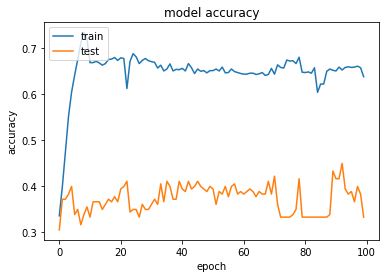

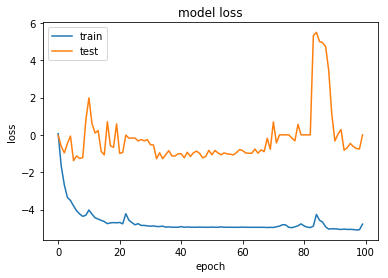

In [522]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

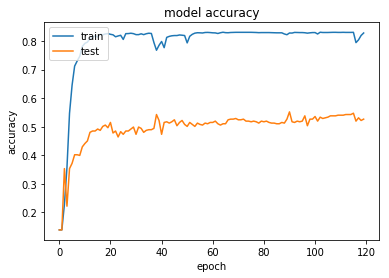

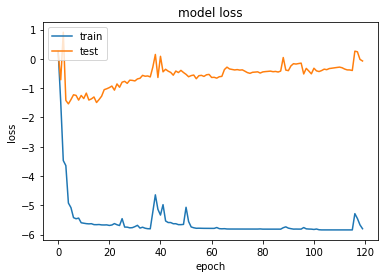

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [297]:

model.save('models/model_bestModel_1.h5')


In [469]:
del model

# Best Model So Far

In [689]:
model = load_model('models/model_bestModel_1.h5')

In [709]:
scores = model.evaluate(xtest, labels_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.5460829493087558


In [703]:
len(liberal)

2025

In [572]:
import keras.preprocessing.text


text = 'slavery created part wealth obviously created wealth black american'


tk = keras.preprocessing.text.Tokenizer(
        nb_words=50,
        lower=True,
        split=" ")

tk.fit_on_texts(text)

predList = [0]*50
p = []
w = [] 
for word in text.split():
    if word in vocab_to_int:
        w.append(vocab_to_int[word])
    else:
        w.append(0)
i2 = 1
for i in range(len(w)-1,-1,-1):
    predList[len(predList)-i2]= w[i]
    i2 += 1
plist = np.array(predList)
# plist.shape = (50,)

# predList.append([vocab_to_int[word] for word in text.split()])
            
pred = np.zeros((seq_len,), dtype=int)
# print(features[:10,:100])
# for i in enumerate(p):
#     pred[i :] = np.array(row)[:seq_len]


prediction = model.predict(xtest)
pred1 = []
for item in prediction:
    if item < -.333:
        pred1.append(-1)
    elif item > .333:
        pred1.append(1)
    else:
        pred1.append(0)
# print((labels_test))
# print (np.array(pred1))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, np.array(pred1))
print(cm)

/anaconda3/lib/python3.6/site-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


[[63  3  1]
 [53  0  0]
 [53  4  3]]


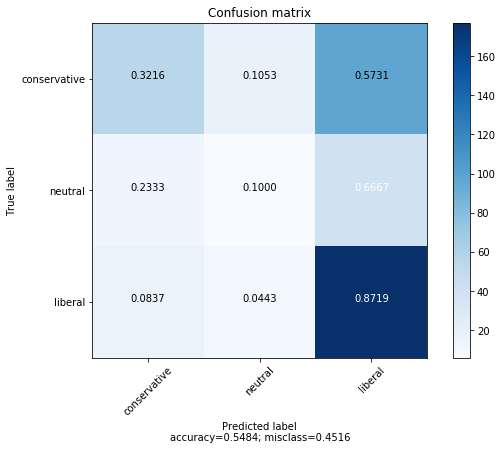

In [486]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
plot_confusion_matrix(cm, ['conservative','neutral','liberal'])

In [726]:
import pickle

with open('listfile', 'wb') as fp:
    pickle.dump(vocab_to_int, fp)

# Predicting Model

## -1 = conservative, 0 = neutral, 1 = liberal

In [723]:
with open ('listfile', 'rb') as fp:
    vocab_to_int = pickle.load(fp)
    
def lemmat(dataList):
    for i in range(len(dataList)):
        dataList[i] = " ".join([Word(word).lemmatize() for word in dataList[i].split()])
    return dataList

def cleanList(dataList):
    newList = []
    #lowercase
    newList = [x.lower() for x in dataList]
    #removes punctuations
    newList = [s.translate(str.maketrans('', '', string.punctuation)) for s in  newList]
    #removes stop words
    stop = stopwords.words('english')
    for i in range(0, len(newList)):
        newList[i] = " ".join(x for x in newList[i].split() if x not in stop)
    newList = lemmat(newList)
    return newList



def helper_convert_to_int(lst, sequenceLength):
    intList = []
    for each in lst:
        tempList = []
        if each != "":
            for word in each.split():
                if word in vocab_to_int:
                    tempList.append(vocab_to_int[word])
                else:
                    tempList.append(0)
            intList.append(tempList)
        

    npList = np.zeros((len(intList), sequenceLength), dtype=int)
    for i, row in enumerate(intList):
        npList[i, -len(row):] = np.array(row)[:sequenceLength]
    return npList

def predictModel(lst, sequenceLength):
    lst = cleanList(lst)
    conversion = helper_convert_to_int(lst, sequenceLength)
    predict = model.predict(conversion)
    prediction = []
    for item in predict:
        if item[0] < -.333:
            prediction.append(-1)
        elif item[0] > .333:
            prediction.append(1)
        else:
            prediction.append(0)
    return prediction

    

# Example

## 1.) Load Model first

In [639]:
model = load_model('models/model_bestModel_1.h5')


## 2. ) Evaluate

In [724]:
prediction = predictModel(['slavery created part wealth obviously created wealth black american', 'slavery created part wealth obviously created wealth white american'], 50)


In [725]:
prediction

[-1, -1]